In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("/content/Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
df.drop("Unnamed: 0",axis=1,inplace=True)
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [5]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [7]:
df.shape

(200, 4)

In [8]:
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


Checking the information of the dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
df.duplicated().sum()

0

In [12]:
df.nunique()

,0
TV,190
Radio,167
Newspaper,172
Sales,121


<Axes: xlabel='TV', ylabel='Sales'>

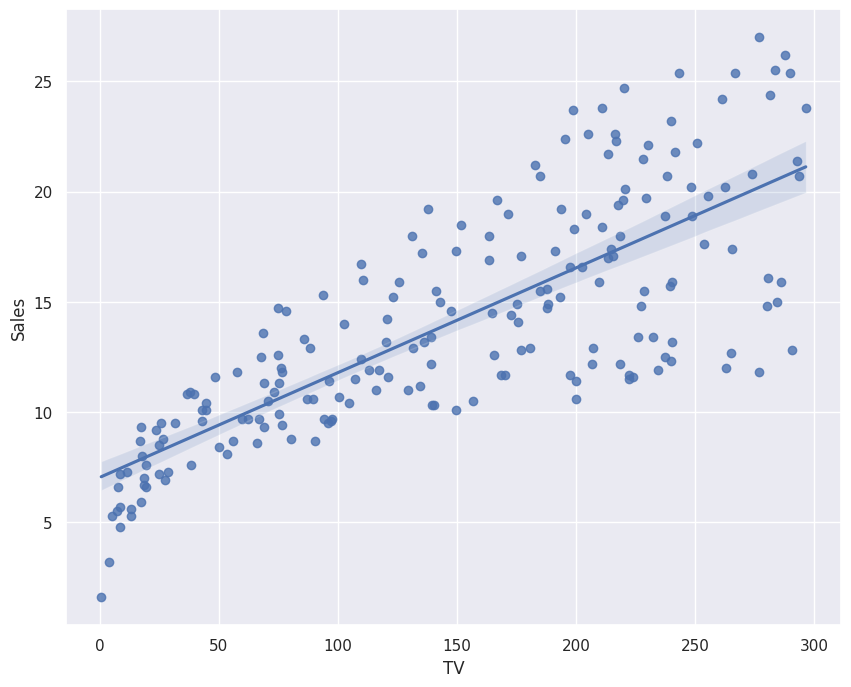

In [13]:
plt.figure(figsize=(10,8))
sns.regplot(data=df,x='TV',y='Sales')

<Axes: xlabel='Radio', ylabel='Sales'>

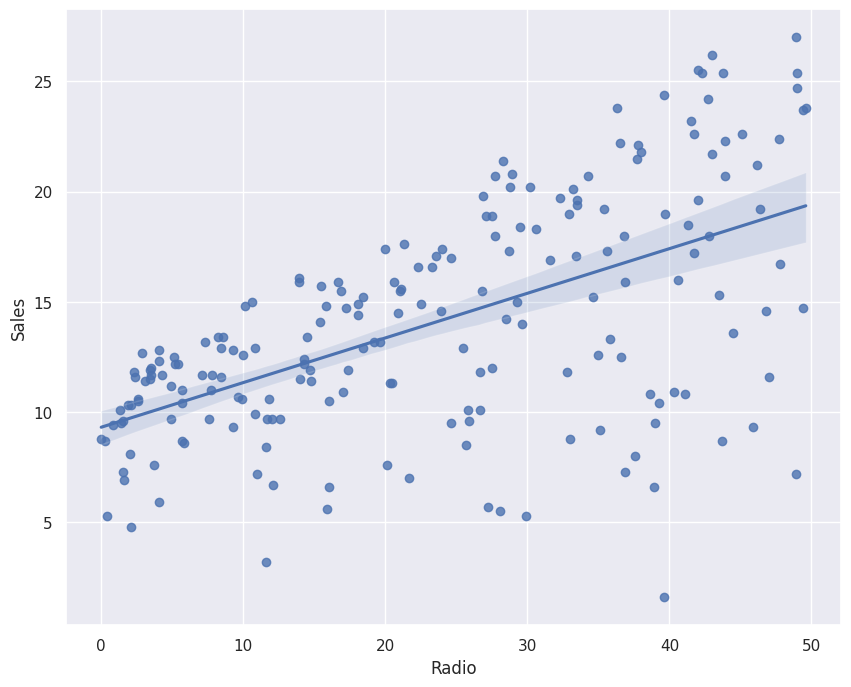

In [14]:
plt.figure(figsize=(10,8))
sns.regplot(data=df,x='Radio',y='Sales')

<Axes: xlabel='Newspaper', ylabel='Sales'>

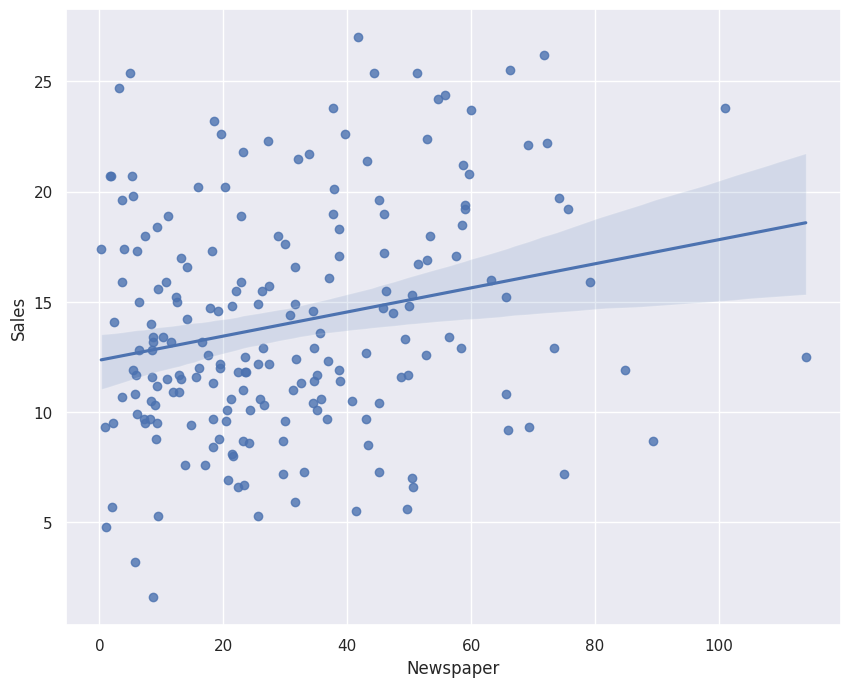

In [15]:
plt.figure(figsize=(10,8))
sns.regplot(data=df,x='Newspaper',y='Sales')

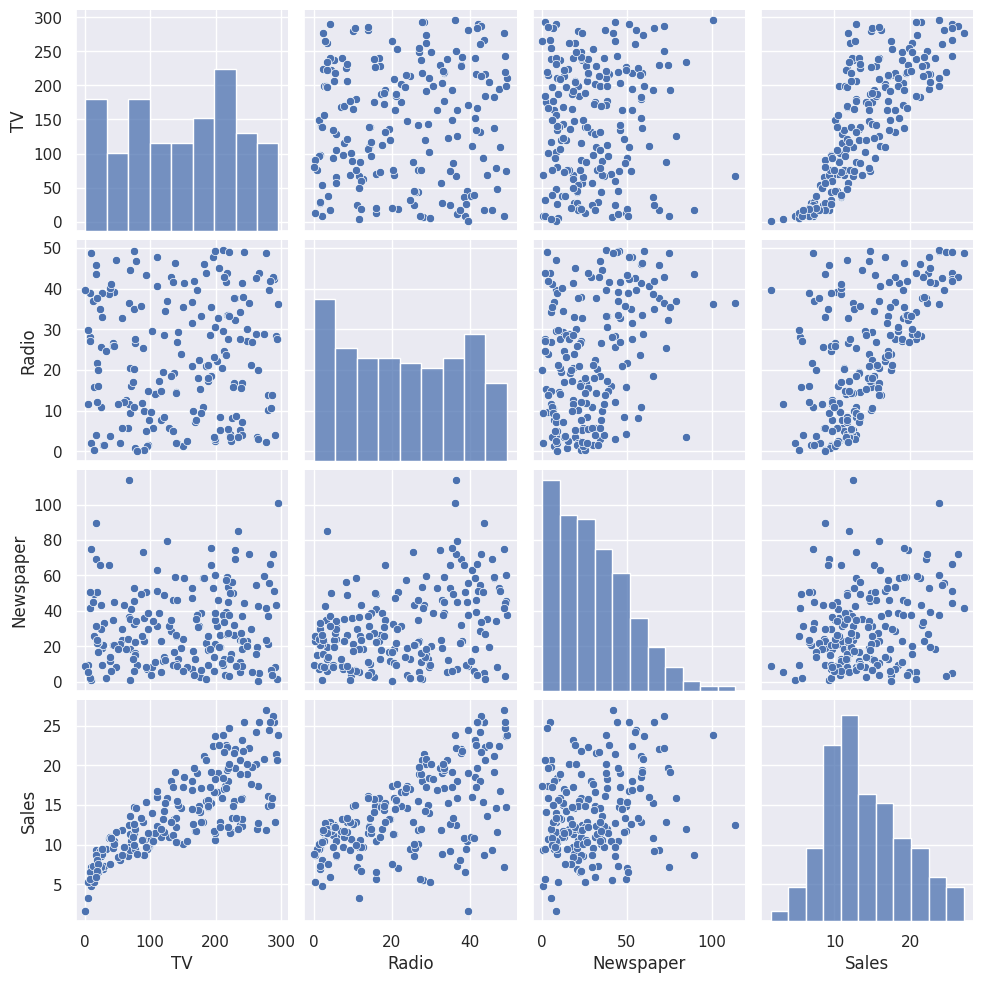

In [16]:
sns.pairplot(df)

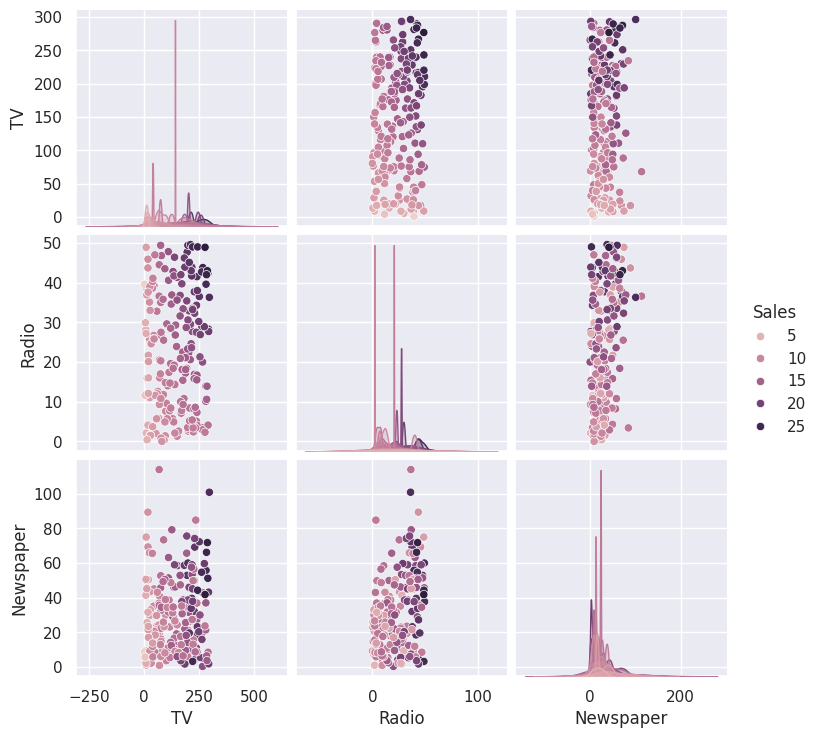

In [17]:
sns.pairplot(data=df,hue='Sales')

<Axes: >

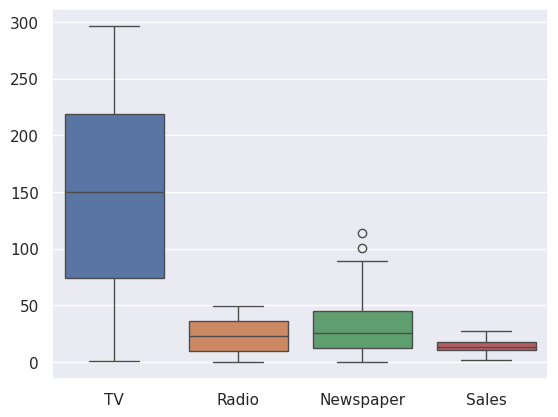

In [18]:
sns.boxplot(data=df)

In [19]:
df['TV'].value_counts()

,count
TV,
199.8,2
109.8,2
17.2,2
177.0,2
222.4,2
...,...
139.3,1
216.8,1
199.1,1


In [21]:
df['Newspaper'].value_counts()

,count
Newspaper,
9.3,3
25.6,3
8.7,3
34.6,2
8.5,2
...,...
27.2,1
31.7,1
19.3,1


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,accuracy_score

In [23]:
x=df[['TV','Radio','Newspaper']]
y=df[['Sales']]

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=51)
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [26]:
y_pred=model.predict(x_test)
y_pred

array([[11.97312561],
       [20.23176536],
       [13.38822857],
       [12.0974879 ],
       [ 4.53157716],
       [14.28524433],
       [15.51393986],
       [21.7241231 ],
       [12.18116482],
       [13.96304017],
       [16.66943736],
       [ 7.11112233],
       [12.78962103],
       [11.46926161],
       [12.07321755],
       [18.98061007],
       [12.33573161],
       [14.42847869],
       [22.02963829],
       [18.42554105],
       [10.14651642],
       [12.87370627],
       [15.19588354],
       [11.38619153],
       [19.98585303],
       [14.97661689],
       [23.78312095],
       [16.70156332],
       [17.27085273],
       [23.2731835 ],
       [16.44667178],
       [ 7.7772211 ],
       [16.78838446],
       [15.02256333],
       [ 9.77867148],
       [15.89627063],
       [ 7.85338865],
       [ 8.88378547],
       [15.33530012],
       [21.63029002]])

In [27]:
print(f''' Train Accuracy:{r2_score(y_train,model.predict(x_train))},
Test Accuracy:{r2_score(y_test,y_pred)}''')

 Train Accuracy:0.8935562677321687,
Test Accuracy:0.9079126096145103


In [28]:
model=RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [29]:
y_pred_random=model.predict(x_test)
r2_score(y_test,y_pred_random)

0.978086892593541